# Topic: Basic data statistics and Exploratory Data Analysis (EDA)

**Abstract**

Data Pre-processing and Feature selection steps:

*  Loading Libraries
*  Loading Data
*  Analyzing Data 
*  Descriptive Statistics
*  Dropping Irrelevant Features
*  Taking care of the missing data
*  Data Wrangling
*  EDA (Exploratory Data Analysis)
    *  Univariate Analysis
    *  Bivariate Analysis
    *  Multivariate Analysis
*  Feature Engineering
*  Finding Important Features



About Dataset

*   IDPatientCare_Situation: Care situation of a patient during treatment
*   Diagnosed_Condition: The diagnosed condition of the patient
*   ID_Patient: Patient identifier number
*   Treatmentwithdrugs: Class of drugs used during treatment
*   Survived1year: If the patient survived after one year (0 means did not survive; 1 means survived)
*   Patient_Age: Age of the patient
*   PatientBodyMass_Index: A calculated value based on the patient’s weight, height, etc.
*   Patient_Smoker: If the patient was a smoker or not
*   PatientRuralUrban: If the patient stayed in Rural or Urban part of the country
*   PreviousCondition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Numberofprevcond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Numberofprev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )


















## Importing Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 9)

Pandas and numpy is used for data manipulation and matplotlib and seaborn is used for data visualization

## Reading the dataset

In [42]:
data_train = pd.read_csv('https://raw.githubusercontent.com/priyankads/Patient-Survival-After-One-Year-of-Treatment/main/Training_set_intermediate.csv')

## Analyzing the data

To find number of rows and columns, datatypes, values in data, duplicates, missing values in dataset using .head(), .shape(), .info(), .duplicated(), .isnull()

In [43]:
data_train.head() #returns first five rows/observations

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


.head() will display first five rows of the dataframe

In [44]:
data_train.shape

(23097, 18)

shape will display the number of rows 23097 and columns(features) 18 present in the training dataset

In [45]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

Summary of data:


*   there are total 23097 observations with 16 features.
*   Attributes Treated_with_drugs, Patient_Smoker, Patient_Rural_Urban,    Patient_mental_condition are categorical variables.
*   Attributes Treated_with_drugs, A, B, C, D, E, F, Z have missing values.






#### checking for duplicates 

In [46]:
data_train.duplicated().sum()

0

#### calculating amonut of missing data

In [47]:
a = data_train.isnull().sum()
a

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

This shows the sum of missing data in each column/feature. As we can see above independent variables Treated_with_drugs, A, B, C, D, E, F, Z and Number_of_prev_cond have 13, 1235, 1235, 1235, 1235, 1235, 1235, 1235, 1235 missing data respectively . 

In [48]:
(a/(len(data_train)))*100

ID_Patient_Care_Situation    0.000000
Diagnosed_Condition          0.000000
Patient_ID                   0.000000
Treated_with_drugs           0.056284
Patient_Age                  0.000000
Patient_Body_Mass_Index      0.000000
Patient_Smoker               0.000000
Patient_Rural_Urban          0.000000
Patient_mental_condition     0.000000
A                            5.347015
B                            5.347015
C                            5.347015
D                            5.347015
E                            5.347015
F                            5.347015
Z                            5.347015
Number_of_prev_cond          5.347015
Survived_1_year              0.000000
dtype: float64

This shows the percentage of missing values in each column. For columns A, B, C, D, E, F and Z it's 5% approximately

## summary of the statistical distribution of a dataset (Descriptive Statistics)

.describe() is used to get the summary of the statistical distribution of a dataset like count of observations, mean, standard deviation, min and max value of each column, and 25th, 50th(median) and 75th percentile of each column which can help us to understand the data more properly.

In [49]:
data_train.describe() ## Descriptive statistics for a numerical variable

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


**Data Description:**

* Patient_Age min 0 and max 149 does not make sense.

In [50]:
data_train.describe(include='all') #include = 'all' is used to include all the variables(numeric and categorical)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23084,23097.000000,23097.000000,23097,23097,23097,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
unique,NaN,NaN,NaN,32,NaN,NaN,3,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,DX6,NaN,NaN,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,8606,NaN,NaN,13246,16134,23097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,16545.712041,26.413127,6261.280772,NaN,33.209768,23.454820,NaN,NaN,NaN,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,NaN,19.549882,3.807661,NaN,NaN,NaN,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,NaN,0.000000,1.089300,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,NaN,16.000000,20.205550,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,NaN,33.000000,23.386199,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,NaN,50.000000,26.788154,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000


In [51]:
# Calculate and print mean and median
mean_Number_of_prev_cond = data_train['Number_of_prev_cond'].mean()
median_Number_of_prev_cond = data_train['Number_of_prev_cond'].median()
print('Mean Number of previous conditions:', mean_Number_of_prev_cond)
print('Median Number of previous conditions:', median_Number_of_prev_cond)

Mean Number of previous conditions: 1.7504802854267678
Median Number of previous conditions: 2.0


In [52]:
# Frequency counts for categorical variables
cat_counts = data_train['Patient_Rural_Urban'].value_counts()
cat_counts

RURAL    16134
URBAN     6963
Name: Patient_Rural_Urban, dtype: int64

## Dropping Irrelevant Features



Here the goal is to predict if the patient survives after one year of treatment and by common sense we can understand that the person cannot survive beacause of his/her patient ID so we can drop this irrelevant feature.

In [53]:
 data_train = data_train.drop(['Patient_ID'], axis = 1) 

## Taking care of the missing data

As the percentage of missing data is less, that is 0.056% and 5.347% instead of dropping the rows with missing data we will replace them with mode for columns Treated_with_drugs, A, B, C, D, E, F, Z and with value 0 for column Number_of_prev_cond as we don't know about the number of previous health conditions of patients with nan value and relpacing it with mode will result in inaccurate model.

We will replace the missing values in column Treated_with_drugs with the most frequently occuring value.

In [54]:
data_train.Treated_with_drugs.value_counts()

DX6                     8606
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX1 DX2                  448
DX3 DX4                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX1 DX4                  408
DX3 DX5                  407
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX2 DX3 DX4           24
DX1 DX3 DX4 DX5           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

In [55]:
data_train.Treated_with_drugs.fillna(value='DX6', axis = 0, inplace = True)

We will replace missing values in column A, B, C, D, E, F, Z with the most frequently occuring value that is mode.

In [56]:
# following code taken from: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/
data_train['A'] = data_train['A'].fillna(data_train['A'].mode()[0])
data_train['B'] = data_train['B'].fillna(data_train['B'].mode()[0])
data_train['C'] = data_train['C'].fillna(data_train['C'].mode()[0])
data_train['D'] = data_train['D'].fillna(data_train['D'].mode()[0])
data_train['E'] = data_train['E'].fillna(data_train['E'].mode()[0])
data_train['F'] = data_train['F'].fillna(data_train['F'].mode()[0])
data_train['Z'] = data_train['Z'].fillna(data_train['Z'].mode()[0])

In [57]:
data_train.Number_of_prev_cond.fillna(value=0, axis = 0, inplace = True)

**Checking the sum of missing data.**

In [58]:
data_train.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

## Data Wrangling

In [59]:
data_train['Treated_with_drugs'].unique() 

array(['DX6', 'DX2 ', 'DX1 ', 'DX3 ', 'DX5 ', 'DX4 ', 'DX2 DX5 ',
       'DX2 DX3 ', 'DX1 DX3 ', 'DX1 DX2 ', 'DX3 DX4 ', 'DX1 DX4 ',
       'DX1 DX5 ', 'DX2 DX4 DX5 ', 'DX1 DX2 DX3 ', 'DX3 DX5 ', 'DX2 DX4 ',
       'DX3 DX4 DX5 ', 'DX2 DX3 DX5 ', 'DX1 DX2 DX3 DX4 ', 'DX4 DX5 ',
       'DX2 DX3 DX4 ', 'DX1 DX4 DX5 ', 'DX1 DX2 DX4 ', 'DX1 DX3 DX5 ',
       'DX1 DX2 DX5 ', 'DX1 DX3 DX4 ', 'DX1 DX3 DX4 DX5 ',
       'DX1 DX2 DX4 DX5 ', 'DX2 DX3 DX4 DX5 ', 'DX1 DX2 DX3 DX5 ',
       'DX1 DX2 DX3 DX4 DX5 '], dtype=object)

In [60]:
#Function to convert all the values to lower case and stip spaces
def format_value(x):
    x = str(x).strip()
    x = x.lower()
    return x

In [61]:
#mapping the function format_value to "Treated_with_drugs" feature
data_train['Treated_with_drugs'] = data_train['Treated_with_drugs'].map(format_value) 

In [62]:
data_train['Treated_with_drugs'].unique()

array(['dx6', 'dx2', 'dx1', 'dx3', 'dx5', 'dx4', 'dx2 dx5', 'dx2 dx3',
       'dx1 dx3', 'dx1 dx2', 'dx3 dx4', 'dx1 dx4', 'dx1 dx5',
       'dx2 dx4 dx5', 'dx1 dx2 dx3', 'dx3 dx5', 'dx2 dx4', 'dx3 dx4 dx5',
       'dx2 dx3 dx5', 'dx1 dx2 dx3 dx4', 'dx4 dx5', 'dx2 dx3 dx4',
       'dx1 dx4 dx5', 'dx1 dx2 dx4', 'dx1 dx3 dx5', 'dx1 dx2 dx5',
       'dx1 dx3 dx4', 'dx1 dx3 dx4 dx5', 'dx1 dx2 dx4 dx5',
       'dx2 dx3 dx4 dx5', 'dx1 dx2 dx3 dx5', 'dx1 dx2 dx3 dx4 dx5'],
      dtype=object)

# Exploratory Data Analysis (EDA)

* EDA is the process of analyzing and summarizing data sets visually and statistically.
* It involves data collection, data cleaning, data visualization, and interpretation.
* EDA helps us uncover patterns, anomalies, and relationships in our data.

## Univariate Analysis

* Univariate analysis involves studying a single variable in isolation.
* It helps us understand the distribution, central tendency, and spread of each variable.

Distribution of all the numeric features

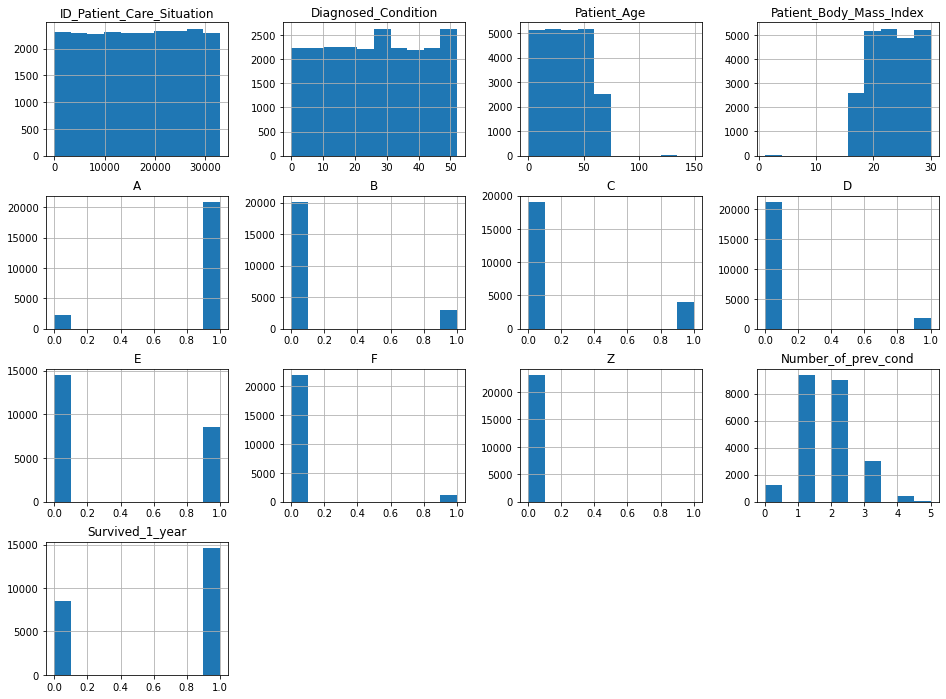

In [63]:
data_train.hist(figsize=(16,12))
plt.show()

Distribution of Patient Age

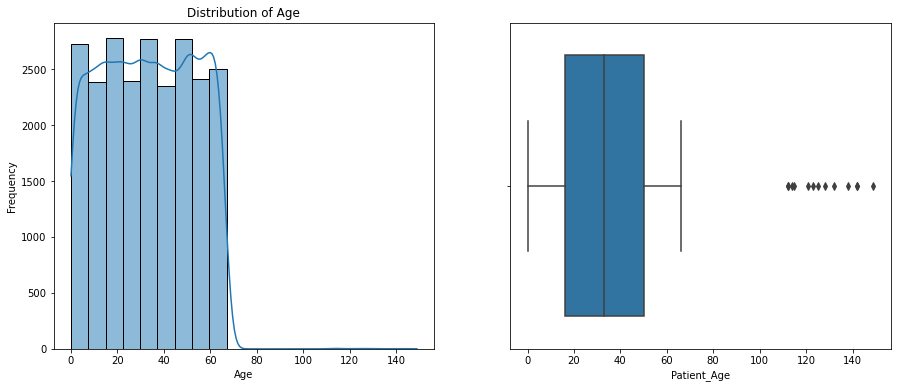

In [64]:
plt.figure(figsize=(15, 6)) #setting figure size
plt.subplot(1, 2, 1) #1st subplot
sns.histplot(data_train['Patient_Age'], bins=20, kde=True)
plt.title('Distribution of Age') #title of first subplot
plt.xlabel('Age') #x-axis of 1st subplot
plt.ylabel('Frequency') #y-axis of 1st subplot
plt.subplot(1, 2, 2) #2nd subplot
sns.boxplot(x=data_train['Patient_Age'])
plt.show() #display plot on the screen

From the above box plot we can see that there are outliers present in patient age feature

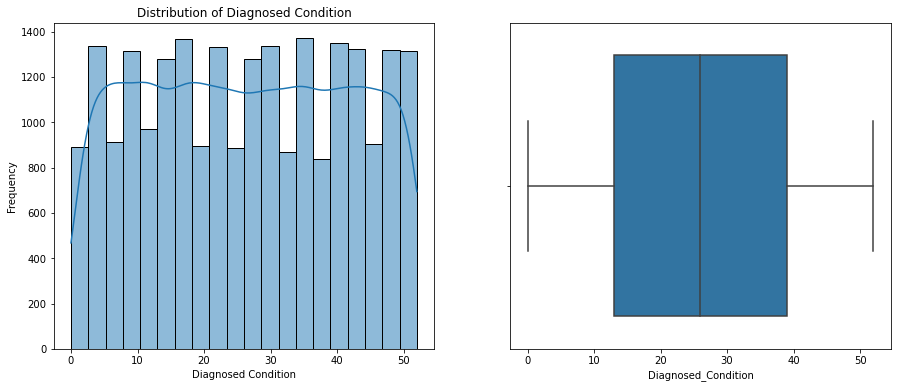

In [65]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(data_train['Diagnosed_Condition'], bins=20, kde=True)
plt.title('Distribution of Diagnosed Condition')
plt.xlabel('Diagnosed Condition')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.boxplot(x=data_train['Diagnosed_Condition'])
plt.show()

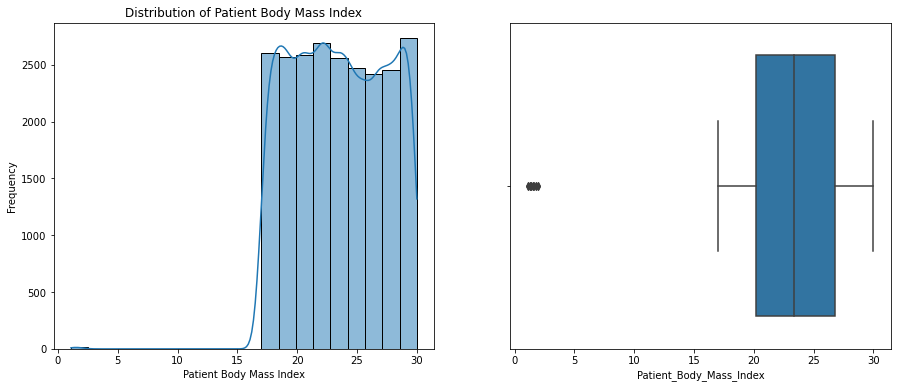

In [66]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(data_train['Patient_Body_Mass_Index'], bins=20, kde=True)
plt.title('Distribution of Patient Body Mass Index')
plt.xlabel('Patient Body Mass Index')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.boxplot(x=data_train['Patient_Body_Mass_Index'])
plt.show()

From the above box plot we can see that there are outliers present in Patient Body Mass Index feature

## Bivariate Analysis

* Bivariate analysis examines the relationship between two variables.
* It helps us understand how changes in one variable affect another.

Pairplot is used for identifying any potential relationships between the variables. 

In [67]:
#creating dataframe with selected numeric columns
column_names = ['Diagnosed_Condition', 'Patient_Age', 'Patient_Body_Mass_Index', 'Number_of_prev_cond', 'Survived_1_year']
df = data_train[column_names]
df

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Survived_1_year
0,8,56,18.479385,2.0,0
1,5,36,22.945566,1.0,1
2,23,48,27.510027,1.0,0
3,51,5,19.130976,1.0,1
4,0,128,1.348400,1.0,1
...,...,...,...,...,...
23092,3,14,18.643448,5.0,0
23093,41,55,23.684585,1.0,1
23094,24,63,27.500039,1.0,0
23095,11,25,23.719125,2.0,1


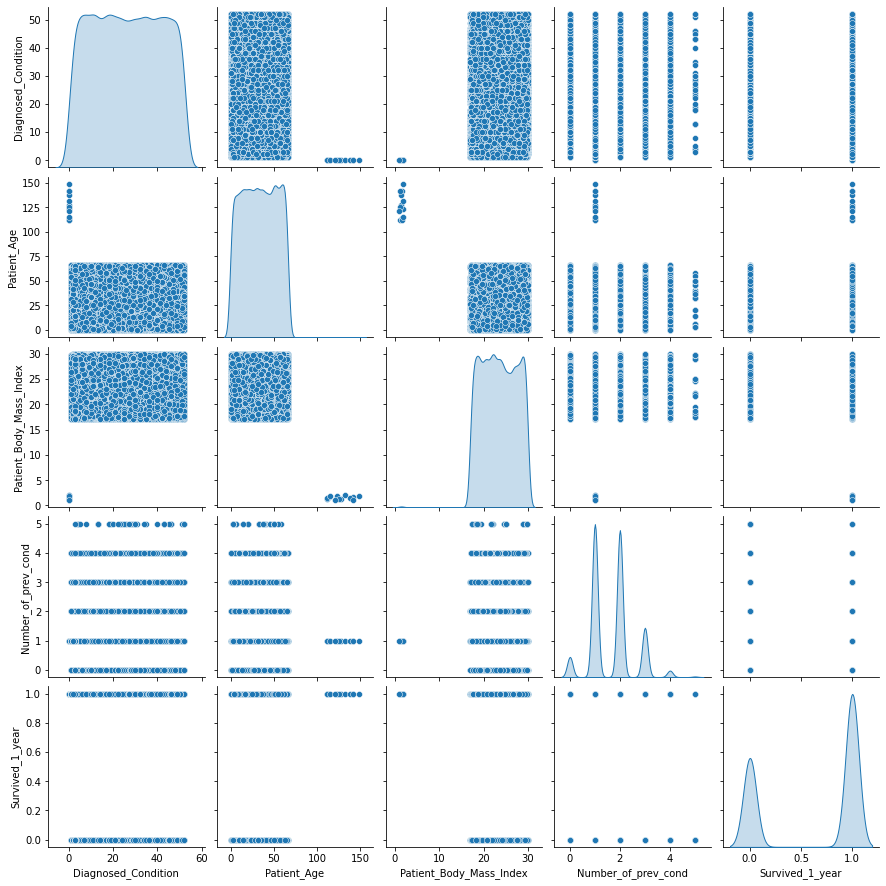

In [68]:
# Create a pair plot for multivariate analysis
sns.pairplot(df, diag_kind='kde')

The above pairplot shows scatter plots of pairwise relationships between selected numerical variables in the dataset, with the diagonal subplots showing smoothed distributions (using kernel density estimates) of each variable. 

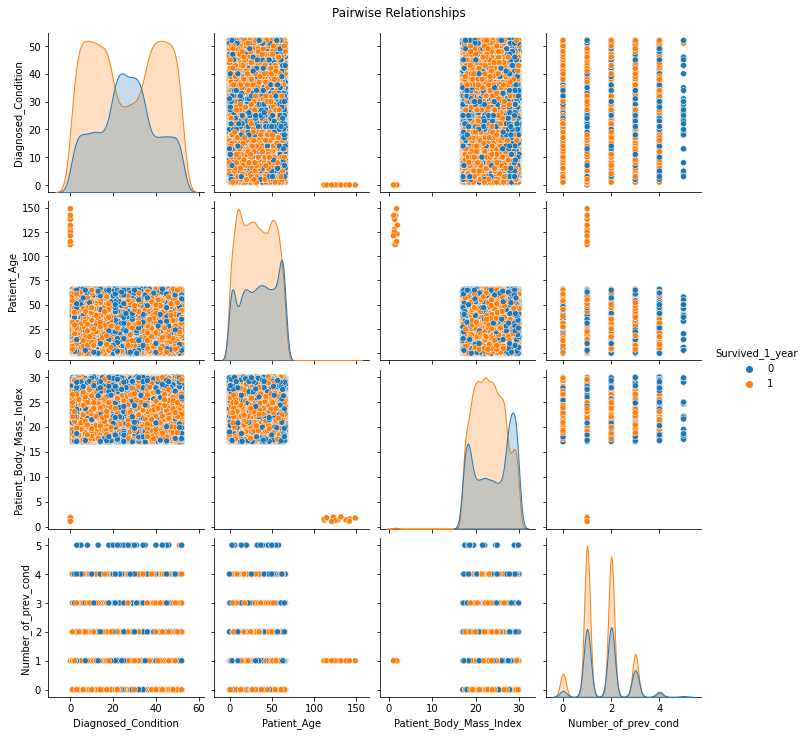

In [69]:
# Create a pair plot for multivariate analysis
sns.pairplot(df, hue='Survived_1_year', diag_kind='kde') #diag_kind='kde' specifies the type of plot to be used on the diagonal subplots
plt.suptitle('Pairwise Relationships', y=1.02) #y=1.02 adjusts the vertical positioning of the title to avoid overlapping with the subplots
plt.show()

The above pairplot shows scatter plots of pairwise relationships between selected numerical variables in the dataset, with the diagonal subplots showing smoothed distributions (using kernel density estimates) of each variable. Different categories in the 'Survived_1_year' column are color-coded.

#### Catplot

catplot() method is used to plot relationship between a numerical and one or more categorical variables.

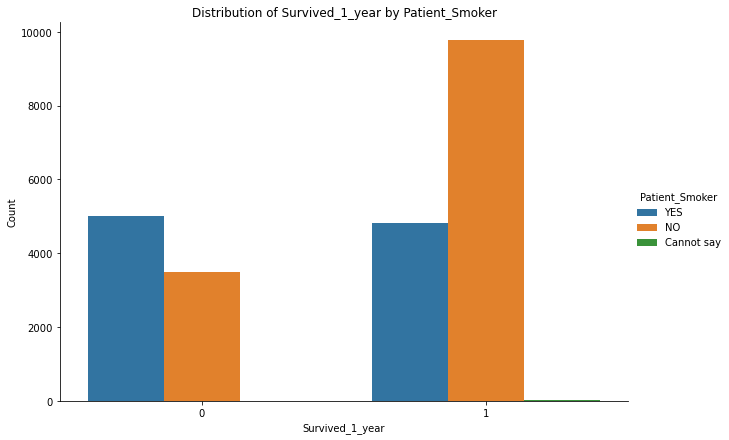

In [70]:
sns.catplot(data=data_train, x='Survived_1_year', hue='Patient_Smoker', kind='count', height=6, aspect=1.5)
plt.title('Distribution of Survived_1_year by Patient_Smoker')
plt.xlabel('Survived_1_year')
plt.ylabel('Count')
plt.show()

The above plot shows the distribution of Patient Smoker feature with respect to if the patient survied after 1 year of treatment or not.

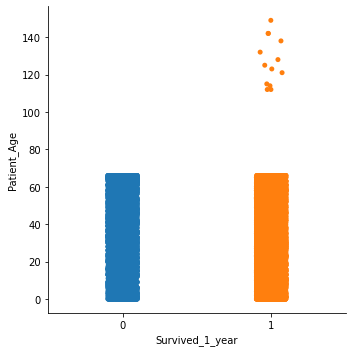

In [71]:
sns.catplot(x="Survived_1_year", y="Patient_Age", data=data_train)

The above plot shows the distribution of Patient Age feature with respect to if the patient survied after 1 year of treatment or not.

## Multivariate Analysis

* Multivariate analysis examines the relationships between multiple variables.
* It helps us understand complex interactions and patterns within the data.

Values close to 1 are positively correlated, values close to -1 are negatively correlated and values close to 0 does not have linear relationship with each other.

<AxesSubplot:>

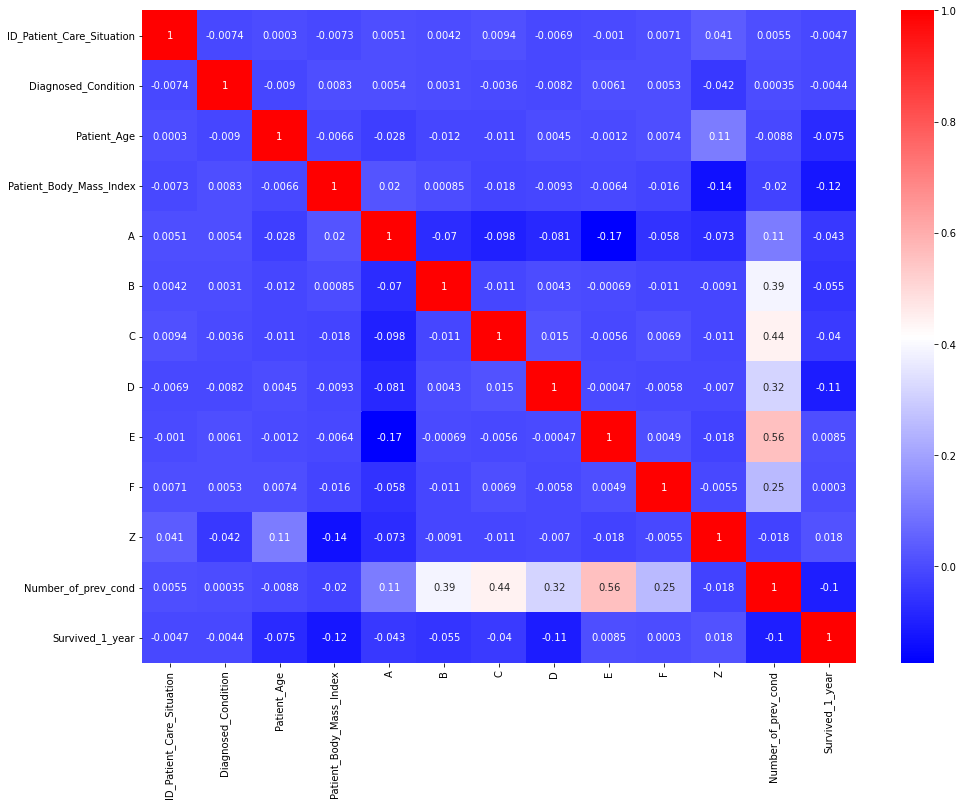

In [72]:
plt.figure(figsize=(16, 12))
sns.heatmap(data_train.corr(), cmap='bwr', annot=True) 


  By looking at the above correlation matrix we can conclude following things:

*   Here correlation coefficient for variables E and Number_of_prev_cond is 0.56 which makes it moderately correlated with each other.
*   No two variables are highly correlated to each other.



In [73]:
corr = data_train.corr()
corr['Survived_1_year'].sort_values(ascending=False)

Survived_1_year              1.000000
Z                            0.018099
E                            0.008466
F                            0.000304
Diagnosed_Condition         -0.004450
ID_Patient_Care_Situation   -0.004685
C                           -0.039701
A                           -0.043404
B                           -0.054560
Patient_Age                 -0.074934
Number_of_prev_cond         -0.101229
D                           -0.107677
Patient_Body_Mass_Index     -0.121844
Name: Survived_1_year, dtype: float64

## Converting categorical variables to numeric 

Encoding categorical variables using one-hot encoding and dummy variables.

In [74]:
data_train['Patient_Smoker'] = data_train['Patient_Smoker'].apply(lambda x: 1 if x == 'YES' else 0)

In [75]:
data_train['Patient_mental_condition'] = data_train['Patient_mental_condition'].apply(lambda y: 1 if y == 'Stable' else 0)

In [76]:
data_train['Patient_Rural_Urban'] = data_train['Patient_Rural_Urban'].apply(lambda y: 1 if y == 'URBAN' else 0)

In [77]:
data_train = pd.get_dummies(data_train, columns=['Treated_with_drugs'])

In [78]:
X = data_train.drop(['Survived_1_year'], axis = 1)   
y = data_train.Survived_1_year  

## Feature Selection

Feature selection is important to choose relevant variables for analysis.
The Chi-Square (χ²) test is a statistical method for feature selection with categorical variables.

In [95]:
#https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223
from sklearn.feature_selection import chi2
chi_scores = chi2(X,y) #calculating chi score

In [96]:
p_values = pd.Series(chi_scores[1],index = X.columns) #calculating p-values from chi score
p_values.sort_values(ascending = False , inplace = True) #sorting the p-values in descending order

<AxesSubplot:>

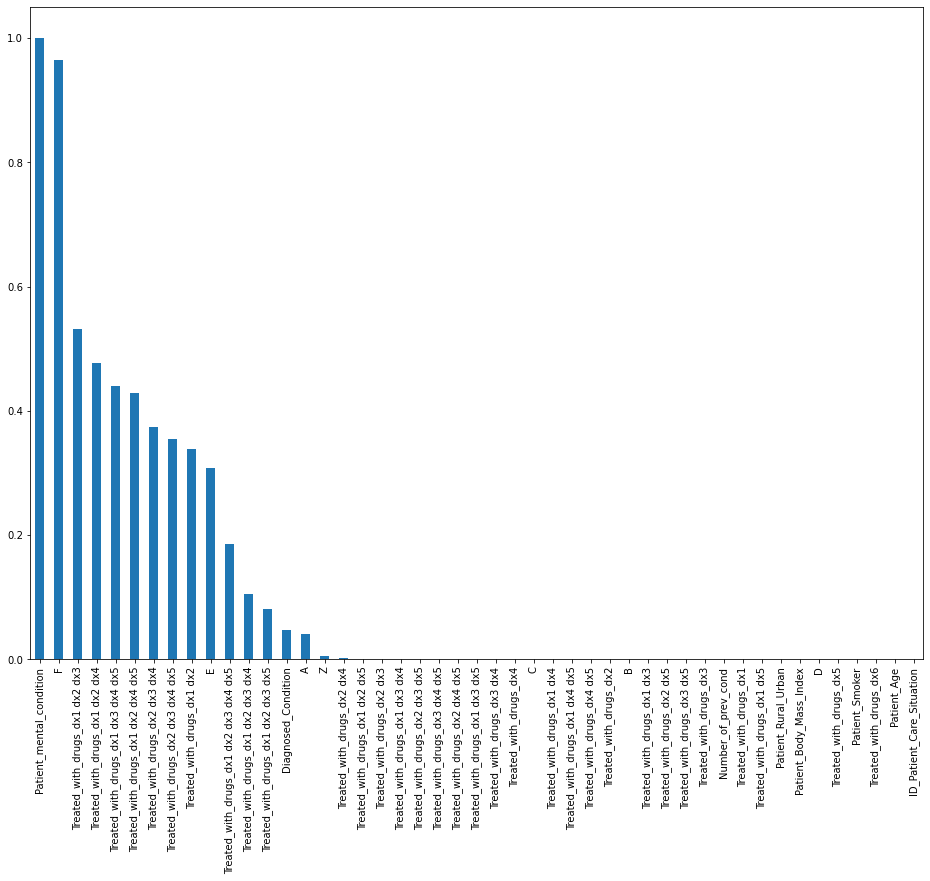

In [87]:
plt.figure(figsize=(16, 12))
p_values.plot.bar()

In [91]:
#best features
selected_features = p_values[p_values <= 0.05].index
selected_features

Index(['Diagnosed_Condition', 'A', 'Z', 'Treated_with_drugs_dx2 dx4',
       'Treated_with_drugs_dx1 dx2 dx5', 'Treated_with_drugs_dx2 dx3',
       'Treated_with_drugs_dx1 dx3 dx4', 'Treated_with_drugs_dx2 dx3 dx5',
       'Treated_with_drugs_dx3 dx4 dx5', 'Treated_with_drugs_dx2 dx4 dx5',
       'Treated_with_drugs_dx1 dx3 dx5', 'Treated_with_drugs_dx3 dx4',
       'Treated_with_drugs_dx4', 'C', 'Treated_with_drugs_dx1 dx4',
       'Treated_with_drugs_dx1 dx4 dx5', 'Treated_with_drugs_dx4 dx5',
       'Treated_with_drugs_dx2', 'B', 'Treated_with_drugs_dx1 dx3',
       'Treated_with_drugs_dx2 dx5', 'Treated_with_drugs_dx3 dx5',
       'Treated_with_drugs_dx3', 'Number_of_prev_cond',
       'Treated_with_drugs_dx1', 'Treated_with_drugs_dx1 dx5',
       'Patient_Rural_Urban', 'Patient_Body_Mass_Index', 'D',
       'Treated_with_drugs_dx5', 'Patient_Smoker', 'Treated_with_drugs_dx6',
       'Patient_Age', 'ID_Patient_Care_Situation'],
      dtype='object')

Features with p-value<0.05 are the best features

**References**



1.   https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223
2.   https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/






